In [176]:
import numpy as np

def gen_data(size=10000, min=-10, max=10):
    half = size // 2
#     X = np.linspace(min, max, size)
    X = np.random.uniform(min, max, (size,))
    y = np.array([x**2 for x in X])
    return (X, y)

X, y = gen_data(min=-1.0, max=1.0)
X[10:], y[10:]

(array([-0.63699318, -0.20248946,  0.36086835, ..., -0.88629366,
        -0.12834769, -0.33934298]),
 array([0.40576031, 0.04100198, 0.13022596, ..., 0.78551645, 0.01647313,
        0.11515366]))

In [177]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
print(train_X.shape, test_X.shape)

(8000,) (2000,)


In [267]:
from keras.models import Model
from keras.layers import Dense, Activation, Input
from keras.optimizers import Adam, SGD, RMSprop, Adagrad

def create_model(optimizer=Adam(learning_rate=0.001), activation='relu'):
    inputs = Input(shape=(1,))
    hidden = Dense(16)(inputs)
    activation = Activation(activation)(hidden)
    predictions = Dense(1)(activation)
    
    model = Model(inputs=inputs, outputs=predictions)
    model.compile(optimizer=optimizer,
                  loss='mse',
                  metrics=['mse'])
    
    return model


def evaluate(model, title):
    history = model.fit(train_X, train_y, validation_split=0.25, epochs=100, batch_size=128, verbose=0)
    score = model.evaluate(test_X, test_y, batch_size=128)

    preds = model.predict(test_X)

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))
    
    fig.suptitle(title)

    ax1.plot(history.history['mse'], label='train mse')
    ax1.plot(history.history['val_mse'], label='validation mse')
    ax1.set_title('MSE')
    ax1.legend()

    ax2.plot(test_X, test_y, 'o', label='test value')
    ax2.plot(test_X, preds, 'o', label='predicted value')
    ax2.set_title('Test value')
    ax2.legend()

    ext_test_X, ext_test_y = gen_data(min=-5.0, max=5.0)
    ext_preds = model.predict(ext_test_X)

    ax3.plot(ext_test_X, ext_test_y, 'o', label='Extended test value')
    ax3.plot(ext_test_X, ext_preds, 'o', label='Extended predicted value')
    ax3.set_title('Extended value')
    ax3.legend()

    plt.show()
    print(score)
    
def performace(f, *args, **kwargs):
    start = time.time()
    f(*args, **kwargs)
    end = time.time()
    print('Wall time = {}s'.format(end - start))

2000/2000 [==============================] - 0s 12us/step


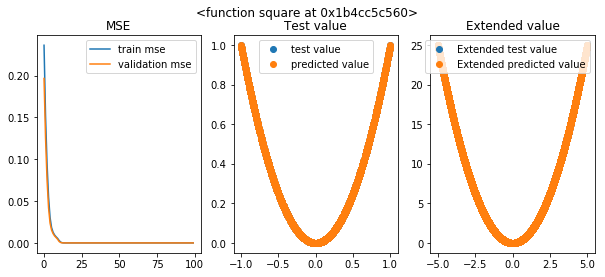

[2.6520616587955968e-15, 2.6520612166443984e-15]
Wall time = 12.262620210647583s
2000/2000 [==============================] - 0s 10us/step


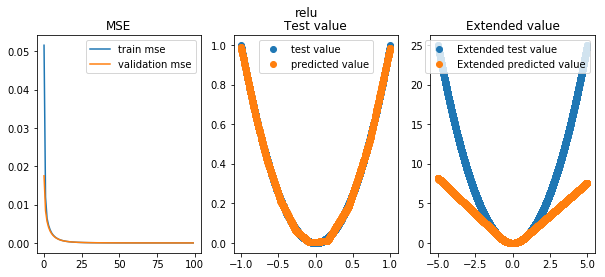

[1.7893424665089697e-05, 1.7893426047521643e-05]
Wall time = 12.02261209487915s
2000/2000 [==============================] - 0s 8us/step


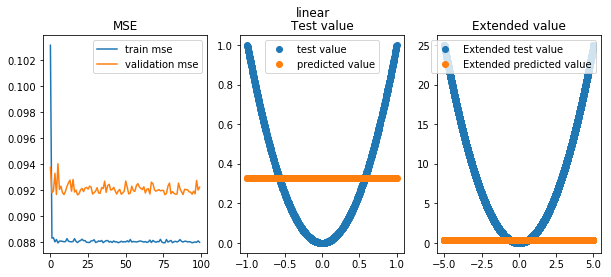

[0.08753664100170136, 0.08753664046525955]
Wall time = 11.455121994018555s
2000/2000 [==============================] - 0s 12us/step


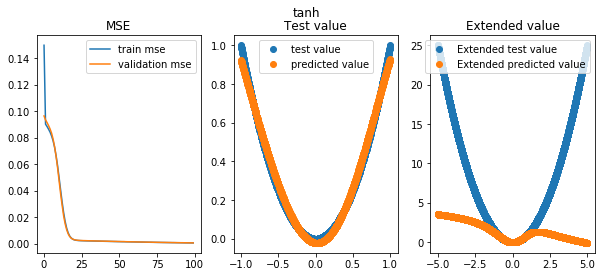

[0.0005544405709952116, 0.0005544406012631953]
Wall time = 12.600294828414917s
2000/2000 [==============================] - 0s 13us/step


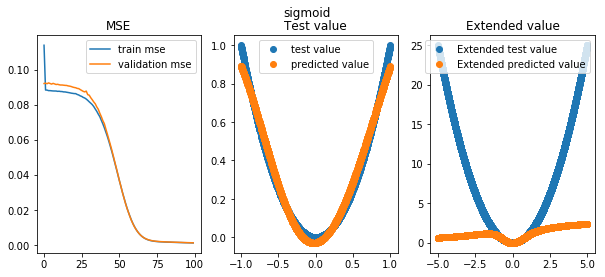

[0.0011441721990704536, 0.0011441721580922604]
Wall time = 13.101003885269165s
2000/2000 [==============================] - 0s 12us/step


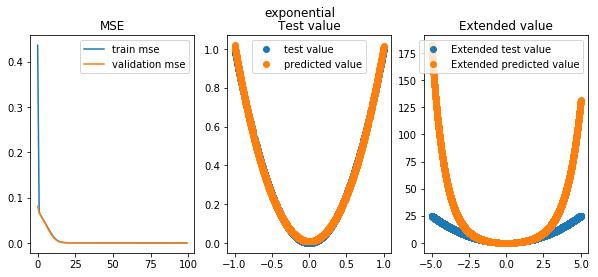

[3.838215858559124e-05, 3.8382160710170865e-05]
Wall time = 13.336753845214844s
2000/2000 [==============================] - 0s 11us/step


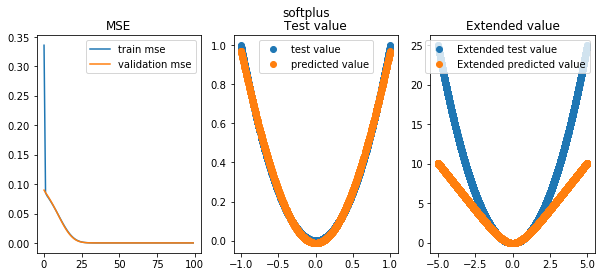

[9.331646602367982e-05, 9.331646288046613e-05]
Wall time = 15.582477807998657s


In [268]:
def square(x):
    return x**2

activations = [square, 'relu', 'linear', 'tanh', 'sigmoid', 'exponential', 'softplus']

models = [(create_model(activation=act), act) for act in activations]

# model.summary()

for model, title in models:
    performace(evaluate, model, title)

2000/2000 [==============================] - 0s 8us/step


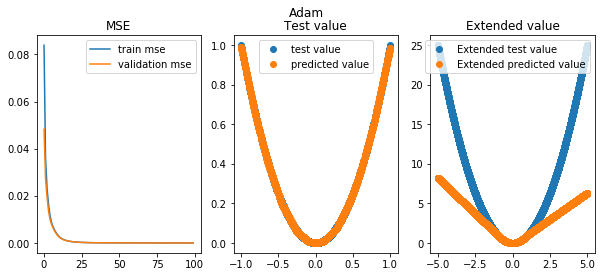

[6.077251582610188e-06, 6.0772513279516716e-06]
Wall time = 10.936430931091309s
2000/2000 [==============================] - 0s 8us/step


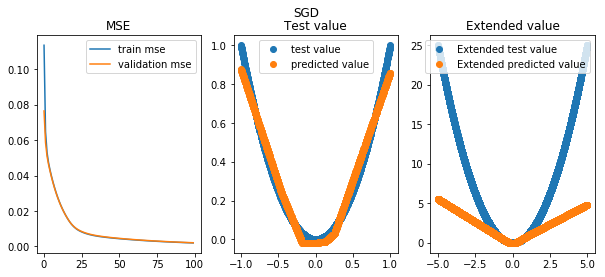

[0.0019016601657494902, 0.0019016603473573923]
Wall time = 9.607023000717163s
2000/2000 [==============================] - 0s 13us/step


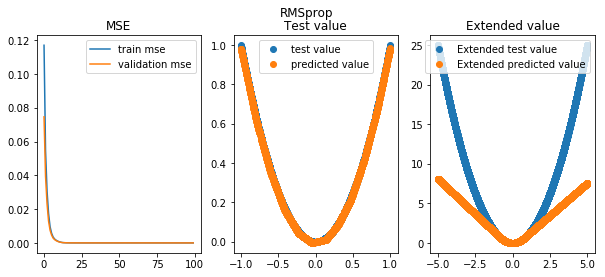

[3.268015949288383e-05, 3.268016007496044e-05]
Wall time = 10.005277872085571s
2000/2000 [==============================] - 0s 9us/step


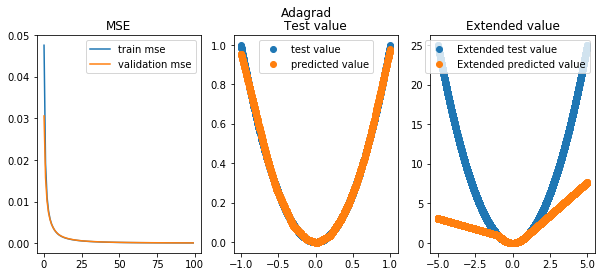

[5.102043019724078e-05, 5.102043360238895e-05]
Wall time = 10.954519033432007s


In [265]:
import time

models = [
    (create_model(Adam(learning_rate=0.001)), 'Adam'),
    (create_model(SGD(learning_rate=0.01)), 'SGD'),
    (create_model(RMSprop(learning_rate=0.001)), 'RMSprop'),
    (create_model(Adagrad(learning_rate=0.01)), 'Adagrad')
]

for model, title in models:
    performace(evaluate, model, title)

2000/2000 [==============================] - 0s 8us/step


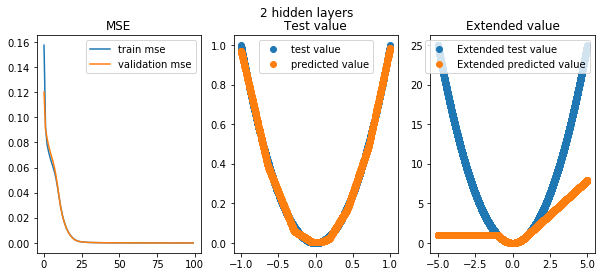

[5.7564796414226295e-05, 5.756479731644504e-05]
Wall time = 10.631973266601562s
Model: "model_167"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_173 (InputLayer)       (None, 1)                 0         
_________________________________________________________________
dense_377 (Dense)            (None, 6)                 12        
_________________________________________________________________
activation_192 (Activation)  (None, 6)                 0         
_________________________________________________________________
dense_378 (Dense)            (None, 6)                 42        
_________________________________________________________________
activation_193 (Activation)  (None, 6)                 0         
_________________________________________________________________
dense_379 (Dense)            (None, 1)                 7         
Total params: 61
Trainable params: 61
Non-t

In [277]:
def create_model2(optimizer=Adam(learning_rate=0.001), activation='relu'):
    inputs = Input(shape=(1,))
    hidden1 = Dense(6)(inputs)
    activation1 = Activation(activation)(hidden1)
    hidden2 = Dense(6)(activation1)
    activation2 = Activation(activation)(hidden2)
    predictions = Dense(1)(activation2)
    
    model = Model(inputs=inputs, outputs=predictions)
    model.compile(optimizer=optimizer,
                  loss='mse',
                  metrics=['mse'])
    
    return model

model = create_model2()
performace(evaluate, model, '2 hidden layers')
model.summary()